In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt 

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.debugging.set_log_device_placement(True)

In [7]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [8]:
train_df["file_path"] = train_df["Id"].apply(lambda Id: "train/" + Id + ".jpg")
test_df["file_path"] = test_df["Id"].apply(lambda Id: "test/" + Id + ".jpg")

## Prepare dataset

In [9]:
data_size = len(train_df)
split_rate = 0.8

split_arr = np.arange(data_size)
np.random.shuffle(split_arr)

train_array = split_arr[:round(data_size*split_rate)]
valid_array = split_arr[round(data_size*split_rate):]


In [10]:
img_size = 224
def img_precess(file_path, pawpularity):
    img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.cast(img, tf.float32)/255
    img = tf.image.resize(img, [img_size, img_size])
    return img, pawpularity

In [11]:
test_file_path = train_df.loc[np.array(range(100)),"file_path"]
test_pawpularity = train_df.loc[np.array(range(100)),"Pawpularity"]

In [12]:
train_file_path = train_df.loc[train_array, "file_path"]
train_pawpularity = train_df.loc[train_array, "Pawpularity"]

valid_file_path = train_df.loc[valid_array, "file_path"]
valid_pawpularity = train_df.loc[valid_array, "Pawpularity"]

In [13]:
train_ds = tf.data.Dataset.from_tensor_slices((train_file_path, train_pawpularity)).map(img_precess).batch(32).prefetch(tf.data.AUTOTUNE)
valid_ds = tf.data.Dataset.from_tensor_slices((valid_file_path, valid_pawpularity)).map(img_precess).batch(32)

Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0


## Create model

In [10]:
# model = tf.keras.applications.ResNet50V2(weights='imagenet')
# for layer in model.layers:
#     layer.trainable = False
# last_layer = model.get_layer("predictions")

In [61]:
# x= tf.keras.layers.Dense(1)(last_layer.output)
# model = tf.keras.Model(model.input, x)
# model.compile(
#     loss=tf.keras.losses.MeanSquaredError(), 
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")]
#     )


In [5]:
model = tf.keras.models.load_model('model_james')

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost

In [14]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_james',
    monitor='val_rmse',
    save_best_only=True
)

early_stop = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_rmse',
    factor=0.5,
    patience=2,
    cooldown=5
)

callbacks = [checkpoint, early_stop, reduce_lr]

history = model.fit(train_ds, validation_data=valid_ds, epochs=10, callbacks=callbacks, verbose=1)

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op DatasetCardinality in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op GreaterEqual in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptimizeDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

C:\Users\yscaa\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Executing op StaticRegexFullMatch in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Select in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StringJoin in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ShardedFilename in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitial

In [6]:
def img_pred(file_path):
    img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.cast(img, tf.float32)/255
    img = tf.image.resize(img, [img_size, img_size])
    return img

In [9]:
test_file_path = test_df["file_path"]
test_ds = tf.data.Dataset.from_tensor_slices(test_file_path).map(img_pred).batch(10)

In [11]:
model_test.predict(test_ds)

array([[38.082745],
       [37.999477],
       [38.46894 ],
       [38.123688],
       [38.038696],
       [37.835117],
       [38.0597  ],
       [37.113167]], dtype=float32)

In [66]:
model.save("model_james_2021-10-03.h5")

C:\Users\yscaa\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


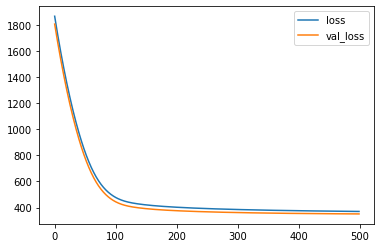

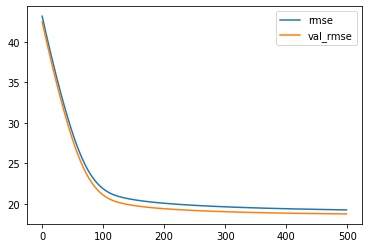

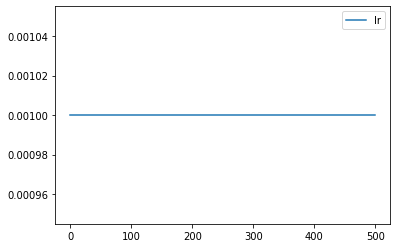

In [70]:
for metrics in [("loss", "val_loss"), ("rmse", "val_rmse"), ["lr"]]:
    pd.DataFrame(history.history, columns=metrics).plot()
    plt.show()

In [71]:
model1 = tf.keras.applications.ResNet50V2(weights='imagenet')
for layer in model1.layers:
    layer.trainable = False
last_layer1 = model1.get_layer("predictions")
y = tf.keras.layers.Dense(1)(last_layer1.output)
model1 = tf.keras.Model(model1.input, y)

In [72]:
model1.load_weights("model_james_2021-10-03_2050")

In [73]:
model1.predict(test_ds)

array([[38.082745],
       [37.999477],
       [38.46894 ],
       [38.123688],
       [38.038696],
       [37.835117],
       [38.0597  ],
       [37.113167]], dtype=float32)